<a href="https://colab.research.google.com/github/sol1978/Bootacamp_Data_Science_Alura/blob/main/Robot_Trading_Desafio_SE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Configuración del ambiente
#####Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora. También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, Numpy, Matplotlib, etc.


In [1]:
#1.1 Definición de variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [2]:
#1.2 Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1.3 Versión Python y librerias necesarias
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
print('------')

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1
------


#2. Obtención de datos
#####Necesitarás acceder a una API que proporcione datos históricos de precios de Bitcoin en formato JSON. Por otro lado, necesitarás realizar Web Scraping en un site de noticias para obtener el precio actual y algunos indicadores de tendencias del Bitcoin.

## 2.1 Precios Históricos del Bitcoin

In [4]:
#Crea una funcion importar_base_bitcoin(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [5]:
#Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.
import yfinance as yf

simbolo_bitcoin = "BTC-USD"
df_bitcoin = yf.download(simbolo_bitcoin, period="7d", interval="5m")
df_bitcoin.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-30 00:00:00+00:00,34531.742188,34564.945312,34531.742188,34564.945312,34564.945312,0
2023-10-30 00:05:00+00:00,34559.351562,34577.847656,34559.296875,34577.781250,34577.781250,3096576
2023-10-30 00:10:00+00:00,34573.507812,34574.605469,34554.511719,34574.605469,34574.605469,18130944
2023-10-30 00:15:00+00:00,34575.640625,34575.640625,34557.765625,34562.996094,34562.996094,20442112
2023-10-30 00:20:00+00:00,34557.855469,34566.679688,34557.046875,34566.679688,34566.679688,2438144


##2.2 Indicadores de Tendencias

In [6]:
#Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:
def extraer_tendencias():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

In [7]:
#Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual. Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36 Edg/118.0.2088.76'}
url ='https://coinmarketcap.com/'
respuesta = requests.get(url, headers=headers)
s = BeautifulSoup (respuesta.content, features ='lxml')
respuesta = s.findAll ('p', {'class':'sc-4984dd93-0 fiHcNM'})

indice = 0
for item in respuesta:
  if item.getText () == 'BTC':
    break
    indice+= 1

respuesta = s.findAll ('div', {'class':['sc-a0353bbc-0 gDrtaY rise','sc-a0353bbc-0 gDrtaY fall','sc-a0353bbc-0 gDrtaY']})
precio_actual = float(respuesta[indice].getText().replace('$', '').replace(',', ''))

lista = []
respuesta = s.findAll ('span', {'class':['sc-d55c02b-0 iwhBxy','sc-d55c02b-0 gUnzUB']})
for item in respuesta [::3]:
  lista.append (item)

print (lista [3])
tendencia = ''
if lista [indice].find ('span')['class'] [0] == 'icon-Caret-down':
    tendencia = "baja"
else:
    tendencia = "alta"



<span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.73%</span>


In [8]:
#Muestra el precio actual del bitcoin y su tendencia
extraer_tendencias()
print('Bitcoin Price: ', precio_actual)
print('Tendencia: ', tendencia)

Bitcoin Price:  35046.33
Tendencia:  alta


#3. Limpieza de Datos
#####Una vez que tengas los datos históricos deberás cargarlos en un DataFrame de Pandas para poder manipularlos y analizarlos, deberás identificar y eliminar los outliers, además de tratar cualquier valor nulo o duplicados en la base. Finalmente, con la base limpia, calcula el precio promedio del Bitcoin.

In [9]:
#Crea una funcion limpieza_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [10]:
#Antes de limpiar la base, crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva base(df_bitcoin_limpio), sin modificar la base original, además es importante entender su contenido:
##Datetime: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.
##Open: Contiene el precio del Bitcoin al inicio del intervalo.
##High: Contiene el precio más alto del Bitcoin durante el intervalo.
##Low: Contiene el precio más bajo del Bitcoin durante el intervalo.
##Close: Contiene el precio del Bitcoin al final del intervalo.
##Volume: Contiene el total de transacciones hechas durante el intervalo.
###Para la limpieza utilizaremos los atributos Datetime, Close y Volume.
df_bitcoin_limpio = df_bitcoin.copy()
df_bitcoin_limpio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1698 entries, 2023-10-30 00:00:00+00:00 to 2023-11-05 01:15:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1698 non-null   float64
 1   High       1698 non-null   float64
 2   Low        1698 non-null   float64
 3   Close      1698 non-null   float64
 4   Adj Close  1698 non-null   float64
 5   Volume     1698 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 92.9 KB


In [11]:
#Analiza la base df_bitcoin_limpio, identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.
df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
print(df_bitcoin.shape, df_bitcoin_limpio.shape)

(1698, 6) (1698, 6)


In [12]:
#Luego busca por valores nulos en la columna Close y trátalos.
df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=['Close'])
print(df_bitcoin.shape, df_bitcoin_limpio.shape)

(1698, 6) (1698, 6)


In [13]:
#Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.
df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]
print(df_bitcoin.shape, df_bitcoin_limpio.shape)

(1698, 6) (838, 6)


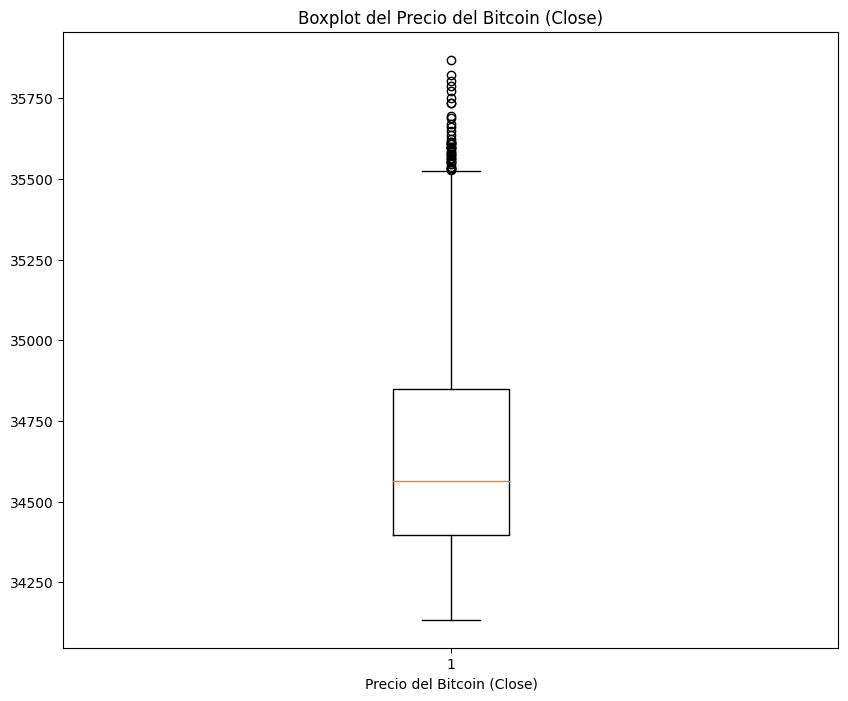

In [14]:
#Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.
plt.figure(figsize=(10, 8))
plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
plt.title('Boxplot del Precio del Bitcoin (Close)')
plt.xlabel('Precio del Bitcoin (Close)')
plt.show()

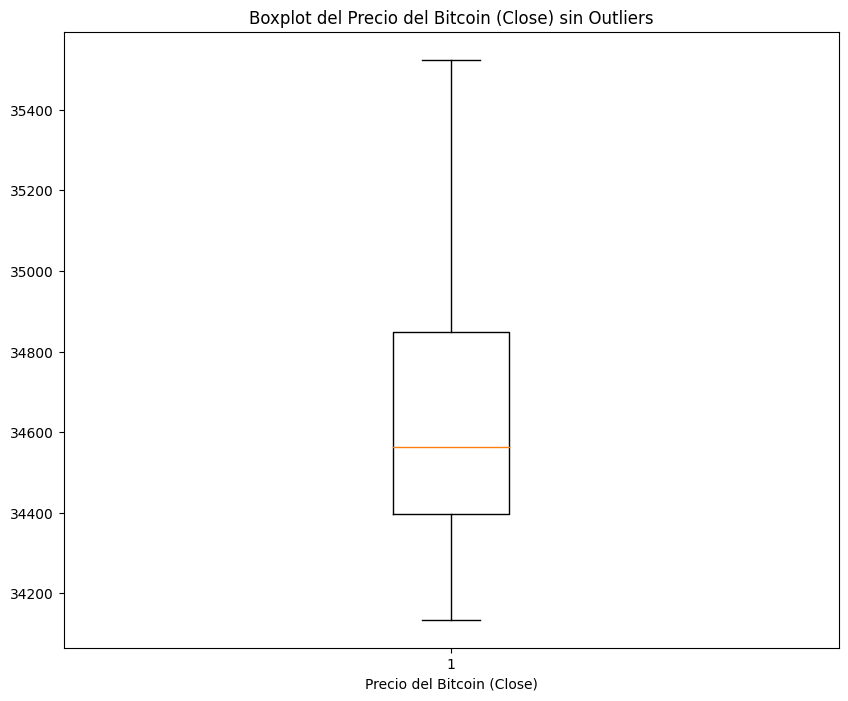

In [15]:
#Eliminar los outliers
plt.figure(figsize=(10, 8))
plt.boxplot(df_bitcoin_limpio['Close'], vert=True, showfliers=False)
plt.title('Boxplot del Precio del Bitcoin (Close) sin Outliers')
plt.xlabel('Precio del Bitcoin (Close)')
plt.show()

In [16]:
#Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.

##Calcular los percentiles y el rango intercuartil (IQR)
Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
Q3 = df_bitcoin_limpio['Close'].quantile(0.75)
IQR = Q3 - Q1

##Calcular los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros cuyo precio esté entre Q1 y Q3
df_bitcoin_filtrado = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]

In [17]:
#Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.
media_bitcoin = df_bitcoin_filtrado['Close'].mean()
print(media_bitcoin)


34572.47750635466


#4. Tomar decisiones
####Llegó el momento de construir tu algoritmo de decisión.

In [18]:
#Crea una funcion tomar_decisiones(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [19]:
#Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
##Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.
##Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.
##Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor 'Esperar'.
if precio_actual >= media_bitcoin and tendencia == 'baja':
    algoritmo_decision = 'Vender'
elif precio_actual < media_bitcoin and tendencia == 'alta':
    algoritmo_decision = 'Comprar'
else:
    algoritmo_decision = 'Esperar'

In [20]:
print (algoritmo_decision)

Esperar


#5. Visualización

In [21]:
#Crea una funcion visualizacion(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [22]:
import matplotlib.pyplot as plt

In [23]:
#Adiciona una nueva columna (Promedio) al dataframe original df_bitcoin y almacena el valor de nuestra variable media_bitcoin.
df_bitcoin['Promedio'] = media_bitcoin

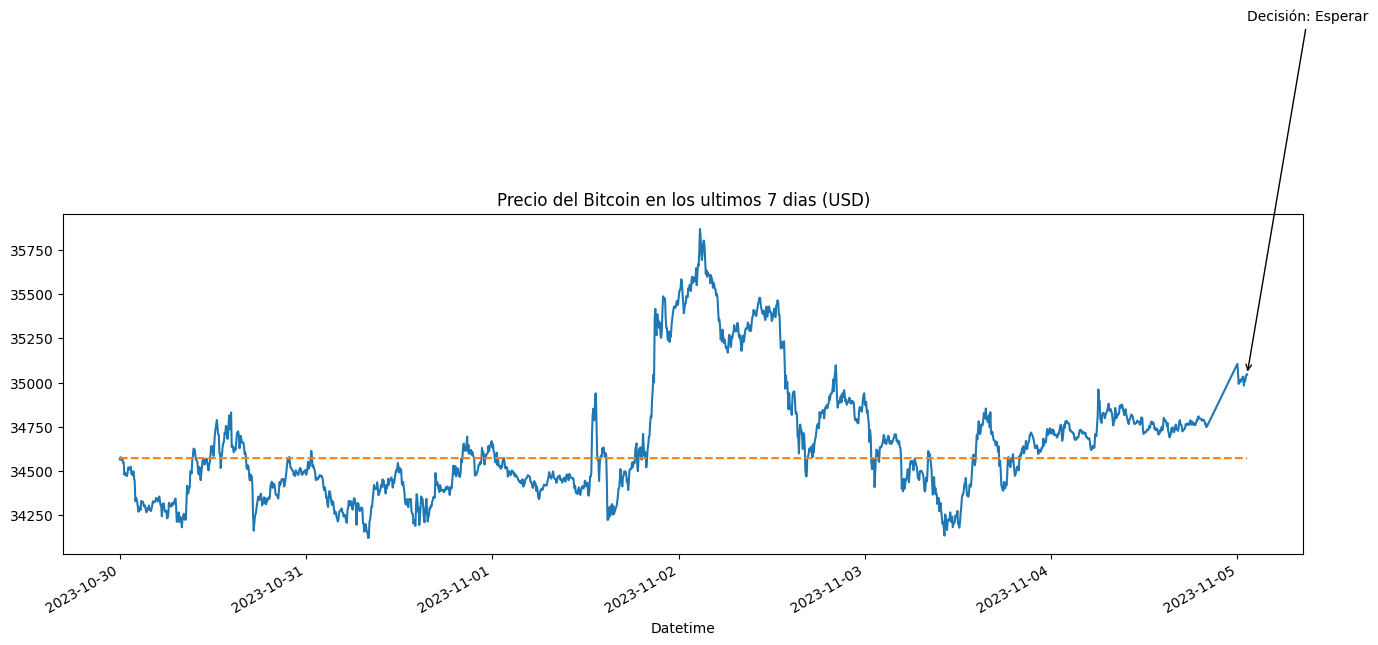

In [24]:
#Graficar
##Configura el tamaño del gráfico en una proporción de 16x5.
##Adiciona un título al gráfico.
##Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin.
##Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin.
##Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.
##Finalmente, usando el método show()muestra en pantalla el gráfico que acabamos de configurar.

plt.figure(figsize=(16, 5))
plt.title('Precio del Bitcoin en los ultimos 7 dias (USD)')
df_bitcoin['Close'].plot(label='Precio del Bitcoin (Close)')
df_bitcoin['Promedio'].plot(label='Promedio', linestyle='--')
decision = algoritmo_decision
plt.annotate(f'Decisión: {decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1] + 2000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

In [25]:
visualizacion()

#6. Automatización
#####El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

In [26]:
#Importa el método 'clear_output()', este método nos permite borrar los resultados de la pantalla antes de imprimir un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla, impórtalo de la siguiente forma: from IPython.display import clear_output.
#Importa también la biblioteca ‘time’ de la siguiente forma: import time, utilizaremos su método time.sleep(300) para interrumpir la ejecución del código cada 300 segundos o 5 minutos.
from IPython.display import clear_output
import time

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)